# Week 6: Revisiting Rheology

## Introduction

When you jump into a swimming pool, it's a completely different experience from putting your fist through a window. This has to do with the differences in <b><i>rheology</i></b> between glass and water. <b><i>Rheology describes the way in which a material deforms in response to stress</i></b>. Glass responds to your fist by shattering in a brittle fashion, while water flows around you when you jump into the pool. In this lab we will explore different types of deformation, and will apply our new knowledge of deformation to some geologic problems.

## Learning goals
By the end of this lab, students should be able to:

- Describe the physical relationship between stress and strain in elastic materials
- Make basic plots using ggplot
- Contextualize modes of deformation in terms of geologic processes

## Background

### Stress and strain

As suggested in the introduction, different substances respond to stress in different ways. <b><i>Stress</i></b>, denoted by $\sigma$, is a force per unit area exerted on an object. <b><i>Strain</i></b>, $\epsilon$, is the objects's response to stress. Strain is expressed as a unitless number describing the change that an object has undergone (e.g., lateral stretching, shearing, etc.).

In physics-speak, "normal" means "perpendicular to a surface." Therefore, we call a strain that results from stress applied perpendicular to a surface the <b><i>normal strain</i></b> ($\epsilon_N$). Normal strain may be computed by dividing the change in length by the original length. It is generally expressed as a percentage, hence why we multiply by 100 below.

$$\epsilon_N = \frac{\Delta L}{L} * 100$$

Objects responding to stress can also exhibit <i><b>shear strain</b></i> ($\gamma$), which is written as

$$\gamma = \tan \beta$$

Unlike normal strain, which results from stress applied perpendicular to a surface, shear strain results from stress applied parallel to a surface. This type of strain is calculated from the tangent of the angle between the original and deformed sides. Both are shown below (from Sharir et al., 2008).

<img src = 'data/normal_vs_shear.png' width = 500>

## Rheology (styles of deformation)

Normal and shear strain broadly describe deformation as a response to applied stresses; however, these terms tell us more about the stress that was applied than about the characteristic behavior of the material undergoing deformation. To understand material behavior, we recognize three modes of deformation: elastic, brittle-plastic, and viscous/ductile.

### Elastic

Elastic materials, such as springs, rubber bands, and moon shoes, strain in proportion to the stress applied. In the case of deformation of a spring, we write Hooke's Law. This law states that the force (which is related to stress by unit area) required to displace an object some distance is equal to the length of displacement times a constant

$$F = kx$$

where $x$ is the change in length of the object undergoing deformation and $k$ is the spring constant. Can you work out the units of $k$? Now think carefully about what this equation tells us about material behavior. We can see that if the force applied is 0, displacement must also be 0. This is the defining characteristic of elastic objects: they regain their original shape when the force applied is removed. This lab will focus on elastic deformation.

Hooke's Law can be written in a more general form as

$$\sigma = E\epsilon$$

where $E$ is a factor called Young's modulus, and $\sigma$ and $\epsilon$ have been defined above as stress and strain, respectively.

### Brittle-plastic deformation

Many materials fall into the plastic rheology class. These materials can withstand a finite amount of stress for which they will experience minimal strain. However, when stress exceeds the material's strength, they will begin to deform permanently (and often rapidly). If the deformation is discontinuous (meaning the material physically shatters), such as the crust fracturing in a geologic fault zone, we say it is <b><i>brittle-plastic</i></b> deformation. If deformation is continuous, permanent, and requires crossing a stress threshold to occur, then we say it is <i><b>plastic, or ductile</b></i>. Can you think of an example of ductile deformation?

The schematic below (from degreetutors.com) illustrates stress-strain relationships in plastic materials.

<img src = 'data/stress_strain.png' width = 500>

### Linear viscous

Linear viscous materials (linear viscous fluids) undergo continuous and permanent deformation. This means that unlike plastic materials, there is no strength threshold that needs to be exceeded for deformation to occur. And unlike elastic materials, linear viscous fluids do not "bounce back" from an applied stress.

Think about the example of jumping into a pool of water. The fact that the water reshapes to a flat surface after you jump into the pool does not mean that the deformation has been undone, just that the process of deformation involved water moving until its new surface was flat. If we could see the individual water molecules, we would see that the structure of the fluid is irreversibly changed every time it deforms.

We will discuss viscous rheologies more in the next lab. For now, you should know that linear viscous fluids exhibit a linear relationship between stress and strain rate, multiplied by the fluid's dynamic viscosity. We typically expresses linear viscous deformation in terms of the shear component of stress and the shear strain rate:

$$\tau = \mu \frac{d\gamma}{dt}$$

where $\tau$ is shear stress, $\mu$ is dynamic viscosity, and $\frac{d\gamma}{dt}$ is shear strain rate.

As we think explore rheology throughout today's lab, ask yourself:

- Why are elastic and plastic rheologies expressed in terms of strain, and linear viscous rheology is in terms of strain rate?
- Why do we only care about the shear component in linear viscous deformation?
- Does this makes sense to you? Why or why not?

We will explore these ideas more in our next lab.

## An example

Imagine you wanted to conduct an experiment to investigate elastic behavior. You could do this very simply using household items, such as a rubber band and an assortment of coins (in this example, we'll just use pennies.) By suspending known quantities of pennies from the rubber band, we cause a downward directed force which results in displacement (stretching) of the band. By tracking both the weight suspended and the resultant displacement, we can make a plot that will reveal whether or not our rubber band obeys linear elastic behavior, i.e. Hooke's Law. 

Data for such an experiment has already been compiled; here, we'll read it in as a .csv file and make a plot.

In [30]:
# we'll start by importing tidyverse, which includes all the functionality that we'll need for this exercise
# install.packages('tidyverse')
library('tidyverse')

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.3     v stringr 1.4.0
v tidyr   1.1.1     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [40]:
# experiment_data <- read_csv('data/rubber band experiment.csv')

In [38]:
# test <- ggplot(data = experiment_data, aes(x = 'weight of pennies (N)', y = 'displacement (m)')) + geom_point()

In [13]:
# masses and weights

g <- 9.81 # gravitational accleration, m/s^2
mass_of_penny <- 2.50 # grams
weight_of_penny <- g*mass_of_penny

In [41]:
# now we should make a sequence that represents the number of pennies that we tested, and their weights
# we started without any pennies suspended from our spring, so our range will start at 0
# the greatest number of pennies that we tested was 20
# and we tested by increments of 5
penny_seq <- seq(from = 0, to = 20, by =5)

# now we want to convert the number of pennies tested in each trial into a weight
# we can do this by performing an operation on the penny_seq, and saving that result to a new sequence
weight_seq <- penny_seq * weight_of_penny

# let's perform another operation to make sure the weights are in kg m/s^2 (currently they are g m/s^2)
# we can do this by dividing by 1000
weight_seq_kg <- weight_seq/1000

# print all arrays to make sure you understand what's happened:
print(cat('penny sequence:', penny_seq))
print(cat('weight sequence:', weight_seq))
print(cat('weight sequence in kg:', weight_seq_kg))

penny sequence: 0 5 10 15 20NULL
weight sequence: 0 122.625 245.25 367.875 490.5NULL
weight sequence in kg: 0 0.122625 0.24525 0.367875 0.4905NULL


In [43]:
# now we'll create a vector to store the length and displacement measurements of our spring
# we'll enter these values by hand, in case they're unevenly spaced
# instead of starting at 0, our vector start at 4, because the original length of our rubber band was four inches
length_inches <- c(4, 4.125, 4.25, 4.375, 4.5)

# however, what we're really interested in is displacement, not length.
# to get displacement, we'll subtract the initial length from the entire vector
displacement_inches <- length_inches - 4

# we want units in meters, so we'll perform another operation
displacement_m <- displacement_inches/39.4 # there are 39.4 inches in a meter

# again, print your arrays to make sure you've followed along
print(length_inches)
print(displacement_inches)
print(displacement_m)

[1] 4.000 4.125 4.250 4.375 4.500
[1] 0.000 0.125 0.250 0.375 0.500
[1] 0.000000000 0.003172589 0.006345178 0.009517766 0.012690355


In [45]:
# when we plot our data, we'll want to make sure that our x and y data are of the same length and type
# check them out now before plotting

print(cat('weight sequence kg type: ', typeof(weight_seq_kg)))
print(cat('weight sequence kg length: ', length(weight_seq_kg)))
print(cat('displacement m type: ', typeof(displacement_m)))
print(cat('displacement m length: ', length(displacement_m)))

weight sequence kg type:  doubleNULL
weight sequence kg length:  5NULL
displacement m type:  doubleNULL
displacement m length:  5NULL


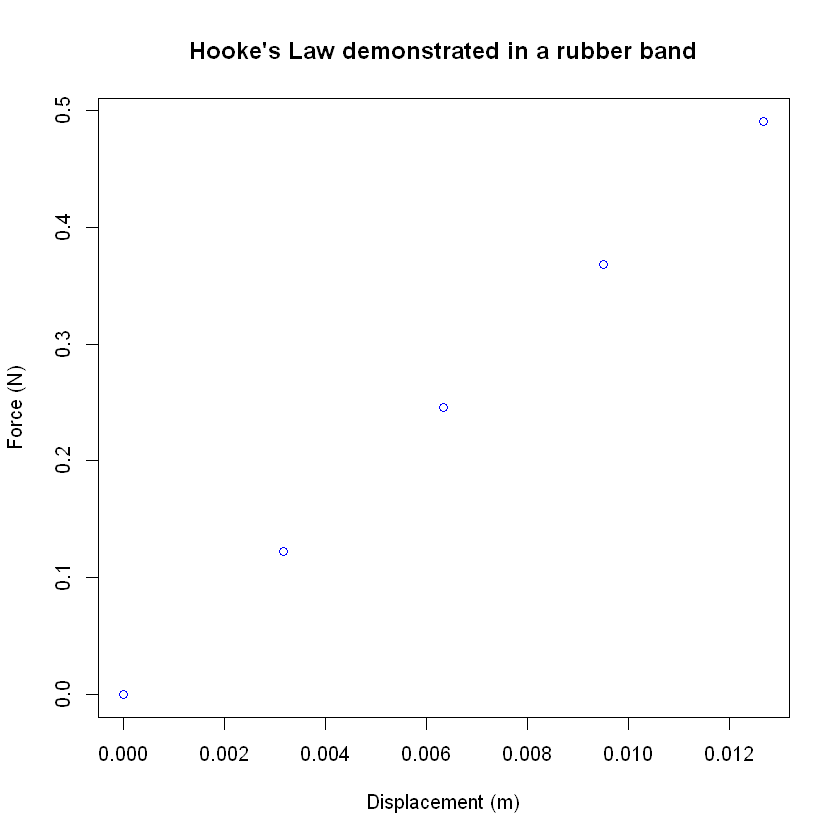

In [54]:
# time to plot! 
# we want our weight (force) on the x-axis, and displacement on the y-axis

# hookes_law <- ggplot(data = aes(x = weight_array_kg, y = displacement_array_m))
# + geom_point()

plot(displacement_m,
     weight_seq_kg, 
    xlab = 'Displacement (m)',
    ylab = 'Force (N)',
     main = 'Hooke\'s Law demonstrated in a rubber band',
    col = 'blue')

And that's all there is to it! You can embellish this plot with different colors, a larger font size, annotations, etc., but it has the functional basics now. We can see that the relationship between force and displacement is indeed linear, so we can say our rubber band demonstrates perfect, linear elastic behavior.

## Questions

1. In the background section of this lab, we state Hooke's Law for spring deformation:

$$F = xk$$

>We then state a "more general" equation with a parameter $E$, the Young's modulus:

$$\sigma = E\epsilon$$

>We say that these are equivalent; how can we get from one equation to the other?

2. In one or two sentences, please explain the relationship between stress and strain in elastic materials. What is the characteristic behavior of these materials?

3. Imagine you tested the same set of weights as used in the example on a different spring. The amount of extension experienced by the new spring was triple the extension in the original spring for each weight. Please manipulate the already created displacement_array_m to reflect this change. Then, please make a plot with both lines appearing on the same graph (HINT: a lot of coding is searching the internet for an example where someone else has already tackled a similar problem. In this case, a quick Google of "how to put two lines on one graph matplotlib" will help if you're stuck). You're plot should include axis labels, titles, etc, just like the example. Finally, summarize the plot in one or two sentences, relating the lines that you've graphed to Hooke's Law. What does this tell you about the materials?

4. Like many materials, the Earth's crust can display a combination of rheologic behaviors. Can you think of an example of the crust behaving in each of the following ways? Please justify.
- elastic
- brittle-plastic
- ductile